## Test Gray Scale

In [23]:
# Visualizations will be shown in the notebook.
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D, MaxPooling1D
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint


Original Size:(160, 60, 3) Type: uint8
Grayscale Size:(160, 60) Type: uint8
HSV Size:(160, 60, 3) Type: uint8
Grayscale HSV Size:(160, 60) Type: uint8


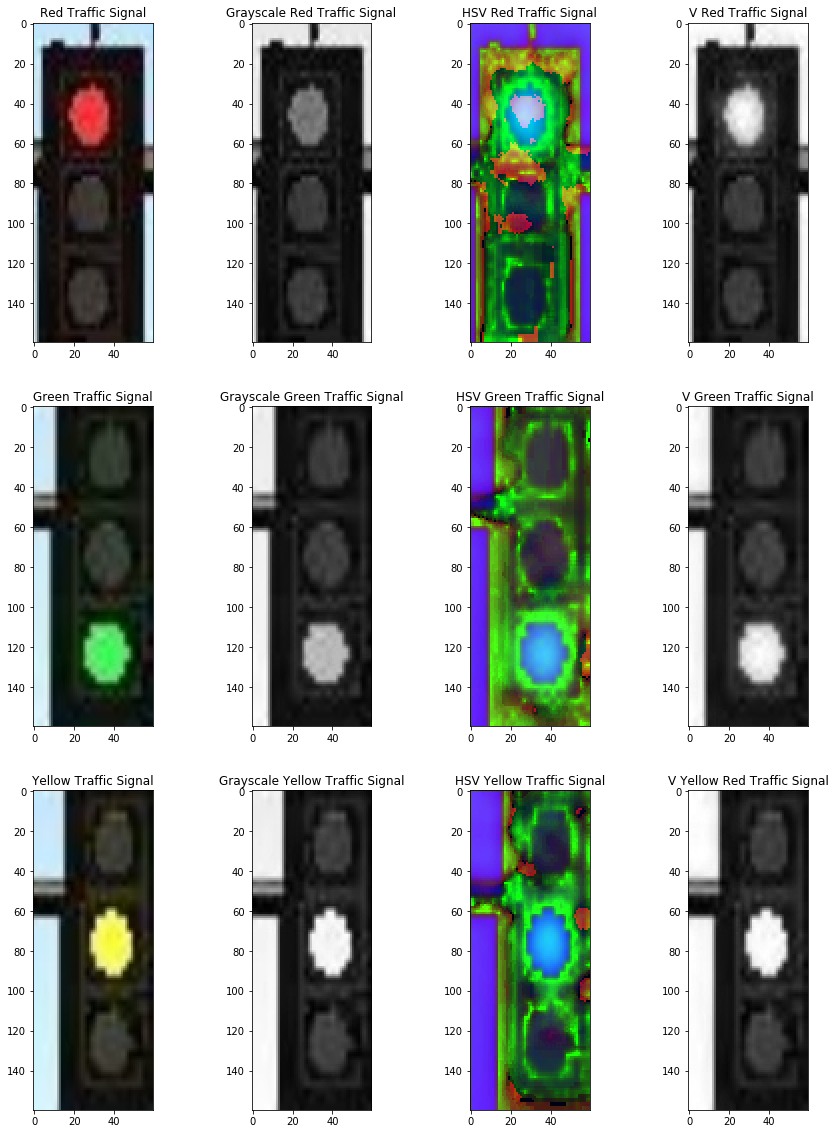

In [24]:
LIGHT_RED = '/home/futaya/tl_image/2_tl_2019_01-26_14_03_8618_0.jpg'
LIGHT_GREEN = '/home/futaya/tl_image/2_tl_2019_01-26_14_03_8428_2.jpg'
LIGHT_YELLOW = '/home/futaya/tl_image/2_tl_2019_01-26_14_03_8578_1.jpg'
red_image = cv2.imread(LIGHT_RED)
green_image = cv2.imread(LIGHT_GREEN)
yellow_image = cv2.imread(LIGHT_YELLOW)
print('Original Size:' + str(red_image.shape) + ' Type: ' + str(red_image.dtype))
gray_red_image = cv2.cvtColor(red_image, cv2.COLOR_BGR2GRAY)
gray_green_image = cv2.cvtColor(green_image, cv2.COLOR_BGR2GRAY)
gray_yellow_image = cv2.cvtColor(yellow_image, cv2.COLOR_BGR2GRAY)
print('Grayscale Size:' + str(gray_red_image.shape) + ' Type: ' + str(gray_red_image.dtype))
hsv_red_image = cv2.cvtColor(red_image, cv2.COLOR_BGR2HSV)
hsv_green_image = cv2.cvtColor(green_image, cv2.COLOR_BGR2HSV)
hsv_yellow_image = cv2.cvtColor(yellow_image, cv2.COLOR_BGR2HSV)
print('HSV Size:' + str(hsv_red_image.shape) + ' Type: ' + str(hsv_red_image.dtype))
gray_hsv_red_image = cv2.cvtColor(hsv_red_image, cv2.COLOR_BGR2GRAY)
gray_hsv_green_image = cv2.cvtColor(hsv_green_image, cv2.COLOR_BGR2GRAY)
gray_hsv_yellow_image = cv2.cvtColor(hsv_yellow_image, cv2.COLOR_BGR2HSV)
print('Grayscale HSV Size:' + str(gray_hsv_red_image.shape) + ' Type: ' + str(gray_hsv_red_image.dtype))

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 20))
ax[0, 0].set_title("Red Traffic Signal")
ax[0, 0].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title("Grayscale Red Traffic Signal")
ax[0, 1].imshow(gray_red_image, cmap='gray')
ax[0, 2].set_title("HSV Red Traffic Signal")
ax[0, 2].imshow(hsv_red_image, cmap='hsv')
ax[0, 3].set_title("V Red Traffic Signal")
ax[0, 3].imshow(hsv_red_image[:,:, 2], cmap='gray')

ax[1, 0].set_title("Green Traffic Signal")
ax[1, 0].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Grayscale Green Traffic Signal")
ax[1, 1].imshow(gray_green_image, cmap='gray')
ax[1, 2].set_title("HSV Green Traffic Signal")
ax[1, 2].imshow(hsv_green_image, cmap='hsv')
ax[1, 3].set_title("V Green Traffic Signal")
ax[1, 3].imshow(hsv_green_image[:,:, 2], cmap='gray')

ax[2, 0].set_title("Yellow Traffic Signal")
ax[2, 0].imshow(cv2.cvtColor(yellow_image, cv2.COLOR_BGR2RGB))
ax[2, 1].set_title("Grayscale Yellow Traffic Signal")
ax[2, 1].imshow(gray_yellow_image, cmap='gray')
ax[2, 2].set_title("HSV Yellow Traffic Signal")
ax[2, 2].imshow(hsv_yellow_image, cmap='hsv')
ax[2, 3].set_title("V Yellow Red Traffic Signal")
ax[2, 3].imshow(hsv_yellow_image[:,:, 2], cmap='gray')

plt.savefig('../pictures/traffic_signal.png')

## Data Load

In [25]:
# from skimage import exposure
# def equalize(X):
#     for i, image in enumerate(X):
#         X[i] = exposure.equalize_hist(image)
#     return X

In [26]:
TOPDIR = '/home/futaya/tl_image/'

In [27]:
from sklearn.model_selection import train_test_split
import sklearn
import glob
from random import shuffle

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            labels = []
            for batch_sample in batch_samples:
                # V of HSV
#                img = cv2.cvtColor(cv2.imread(batch_sample), cv2.COLOR_BGR2HSV)
#                image = img[:,:,2]
                # Gray scale
                image = cv2.cvtColor(cv2.imread(batch_sample), cv2.COLOR_BGR2GRAY)
                # HSV
#                image = cv2.cvtColor(cv2.imread(batch_sample), cv2.COLOR_BGR2HSV)
                # raw
#                image = cv2.imread(batch_sample)
                y = int(batch_sample[-5])
                images.append(image)
                labels.append(y)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = keras.utils.to_categorical(labels, num_classes=3)
            yield sklearn.utils.shuffle(X_train, y_train)

samples = glob.glob(TOPDIR + '*.jpg')

train_samples, validation_samples = train_test_split(samples, test_size=0.2)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=16)
validation_generator = generator(validation_samples, batch_size=16)

In [28]:
# from sklearn.model_selection import train_test_split
# import glob
# files = glob.glob('/home/futaya/image/*.jpg')
# sample_image = cv2.imread(files[0])
# images = []
# measurements = []
# for i, file in enumerate(files):
#     Y = int(file[-5])
#     measurements.append(Y)
#     img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2HSV)
#     #X = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     images.append(img)

# X_train = np.array(images)
# y_train = np.array(measurements).astype(np.uint8)
# #X_train, X_test, y_train, y_test = train_test_split(X, Y)
# print(str(X_train.shape) + ' ' + str(y_train.shape) + ' ' + str(X_train[0][0].dtype) + ' ' + str(y_train[0].dtype))
# #print(str(X_test.shape) + ' ' + str(y_test.shape))

## Stats of train and test data

In [29]:
# yt_values, yt_counts = np.unique(y_train, return_counts=True)
# yv_values, yv_counts = np.unique(y_test, return_counts=True)
# fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
# ax[0].bar(yt_values, yt_counts)
# ax[0].set_title('Train Data')
# ax[1].bar(yv_values, yv_counts)
# ax[1].set_title('Test Data')
# plt.savefig('../pictures/train_data_after.png')

## LeNet

In [30]:
print(np.__version__)

1.14.5


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 160, 60)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 156, 5)            1505      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 78, 5)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 78, 5)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 74, 5)             130       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 37, 5)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 37, 5)             0         
__________

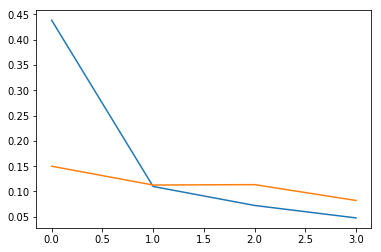

In [31]:
# Grayscale
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,60)))
model.add(Conv1D(5,5,activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.5))
model.add(Conv1D(5,5,activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()
earlystopper  = EarlyStopping(patience=4, verbose=1)
checkpointer = ModelCheckpoint('modelLeNet.h5', verbose=1, save_best_only=True)
history_object = model.fit_generator(train_generator, steps_per_epoch=len(train_samples),
                    validation_data=validation_generator, 
                    validation_steps=len(validation_samples), epochs=4,
                    callbacks=[earlystopper, checkpointer])

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.savefig('../pictures/learning_curv.png')

In [32]:
# # color
# model = Sequential()
# model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,60, 3)))
# model.add(Conv2D(6,(5,5),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))
# model.add(Conv2D(6,(5,5),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam')

# model.summary()
# earlystopper  = EarlyStopping(patience=4, verbose=1)
# checkpointer = ModelCheckpoint('modelLeNet.h5', verbose=1, save_best_only=True)
# history_object = model.fit_generator(train_generator, steps_per_epoch=len(train_samples),
#                     validation_data=validation_generator, 
#                     validation_steps=len(validation_samples), epochs=4,
#                     callbacks=[earlystopper, checkpointer])

# plt.plot(history_object.history['loss'])
# plt.plot(history_object.history['val_loss'])
# plt.savefig('../pictures/learning_curv.png')

# V of HSV
model = Sequential()  
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,60)))  
model.add(Conv1D(5,5,activation='relu'))  
model.add(MaxPooling1D())  
model.add(Dropout(0.5))  
model.add(Conv1D(5,5,activation='relu'))  
model.add(MaxPooling1D())  
model.add(Dropout(0.5))  
model.add(Flatten())  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer='adam')  

Epoch 1/4  
335/336 [============================>.] - ETA: 0s - loss: 0.1546Epoch 00000: val_loss improved from inf to 0.05229, saving model to modelLeNet.h5  
336/336 [==============================] - 3s - loss: 0.1550 - val_loss: 0.0523  
Epoch 2/4  
330/336 [============================>.] - ETA: 0s - loss: 0.0520Epoch 00001: val_loss improved from 0.05229 to 0.04113, saving model to modelLeNet.h5  
336/336 [==============================] - 3s - loss: 0.0520 - val_loss: 0.0411  
Epoch 3/4  
330/336 [============================>.] - ETA: 0s - loss: 0.0365Epoch 00002: val_loss did not improve  
336/336 [==============================] - 3s - loss: 0.0364 - val_loss: 0.0468  
Epoch 4/4  
333/336 [============================>.] - ETA: 0s - loss: 0.0251Epoch 00003: val_loss did not improve  
336/336 [==============================] - 3s - loss: 0.0250 - val_loss: 0.0545  

## Color
model = Sequential()  
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,60, 3)))  
model.add(Conv2D(6,(5,5),activation='relu'))  
model.add(MaxPooling2D())  
model.add(Dropout(0.5))  
model.add(Conv2D(6,(5,5),activation='relu'))  
model.add(MaxPooling2D())  
model.add(Dropout(0.5))  
model.add(Flatten())  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer='adam')  
Epoch 1/4  
335/336 [============================>.] - ETA: 0s - loss: 0.0620Epoch 00000: val_loss improved from inf to 0.19195, saving model to modelLeNet.h5  
336/336 [==============================] - 34s - loss: 0.0618 - val_loss: 0.1920  
Epoch 2/4  
335/336 [============================>.] - ETA: 0s - loss: 0.0164Epoch 00001: val_loss improved from 0.19195 to 0.17228, saving model to modelLeNet.h5  
336/336 [==============================] - 34s - loss: 0.0164 - val_loss: 0.1723  
Epoch 3/4  
335/336 [============================>.] - ETA: 0s - loss: 0.0123Epoch 00002: val_loss improved from 0.17228 to 0.14435, saving model to modelLeNet.h5  
336/336 [==============================] - 34s - loss: 0.0123 - val_loss: 0.1444  
Epoch 4/4  
335/336 [============================>.] - ETA: 0s - loss: 0.0098Epoch 00003: val_loss did not improve  
336/336 [==============================] - 35s - loss: 0.0098 - val_loss: 0.1813  

## Gray Scale
model = Sequential()  
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,60)))  
model.add(Conv1D(5,5,activation='relu'))  
model.add(MaxPooling1D())  
model.add(Dropout(0.5))  
model.add(Conv1D(5,5,activation='relu'))  
model.add(MaxPooling1D())  
model.add(Dropout(0.5))  
model.add(Flatten())  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer='adam')  
Epoch 1/4  
332/336 [============================>.] - ETA: 0s - loss: 0.4421Epoch 00000: val_loss improved from inf to 0.14994, saving model to modelLeNet.h5  
336/336 [==============================] - 3s - loss: 0.4385 - val_loss: 0.1499  
Epoch 2/4  
333/336 [============================>.] - ETA: 0s - loss: 0.1099Epoch 00001: val_loss improved from 0.14994 to 0.11278, saving model to modelLeNet.h5  
336/336 [==============================] - 3s - loss: 0.1099 - val_loss: 0.1128  
Epoch 3/4  
332/336 [============================>.] - ETA: 0s - loss: 0.0724Epoch 00002: val_loss did not improve  
336/336 [==============================] - 3s - loss: 0.0724 - val_loss: 0.1135  
Epoch 4/4  
335/336 [============================>.] - ETA: 0s - loss: 0.0477Epoch 00003: val_loss improved from 0.11278 to 0.08224, saving model to modelLeNet.h5  
336/336 [==============================] - 3s - loss: 0.0477 - val_loss: 0.0822  